# Welcome to the test results fucko

In [1]:
from results import Comparer, Result
import matplotlib.pyplot as plt
from os import system
from tqdm.notebook import trange

In [2]:
execute_string = "venv/bin/python3"

i_file = "-f 'instance/small case/v3.xlsx'"
cut_offs = [193 - 5*i for i in range(1, 39)]

args = [
    (i_file + " -c " + str(c))
    for c in cut_offs
]

execute_statements = [
    execute_string + " demo_usage.py " + arg
    for arg in args
]
execute_statements.append("venv/bin/python3 demo_usage.py -f 'instance/small case/v3.xlsx'")

In [17]:
execute_statements = ["venv/bin/python3 demo_usage.py -f 'instance/small case/v3.xlsx' -c 1"]

In [18]:

l = len(execute_statements)
for i in trange(0, l):
    system(execute_statements[i])

  0%|          | 0/1 [00:00<?, ?it/s]

[05-08 10:41:35] [INFO] Parse instance data successfully.
reading instance runs for 0.096s
forming PTDF matrix runs for 0.001s
forming LODF matrix runs for 0.000s
[05-08 10:41:35] [INFO] remove 6/51 nonzero elements in PTDF that are less than 1e-6.
[05-08 10:41:35] [INFO] remove 8/39 nonzero elements in LODF that are less than 1e-6.
initializing the electricity network runs for 0.003s
initializing the gas network runs for 0.107s
initializing the heating network runs for 0.108s
Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-18
Set parameter NumericFocus to value 3
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
add security constraints of sources (pre-calculation) runs for 0.871s
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model wit

L1 norms between the two compared results:
  Power:
    Wind: 4.47e+02
    TPU: 0.00e+00
    NGU: 4.27e+02
    CHP: 8.74e+02
    gCHP: 0.00e+00
    Avg. transmission line flow. 4.48e+02
  Gas:
    Avg. gas production: 5.10e+01
    Avg. node pressure: 1.13e+00
  Heat:
    CHP: 8.74e+02
    gCHP: 0.00e+00
    Pump: 0.00e+00
    Boiler: 1.42e+03
    Avg. node temperature: 1.08e+03
Difference in operational cost: -1.07e+04


/home/anders/Git/P8_ECM_based_OEF/results/compare_solutions.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


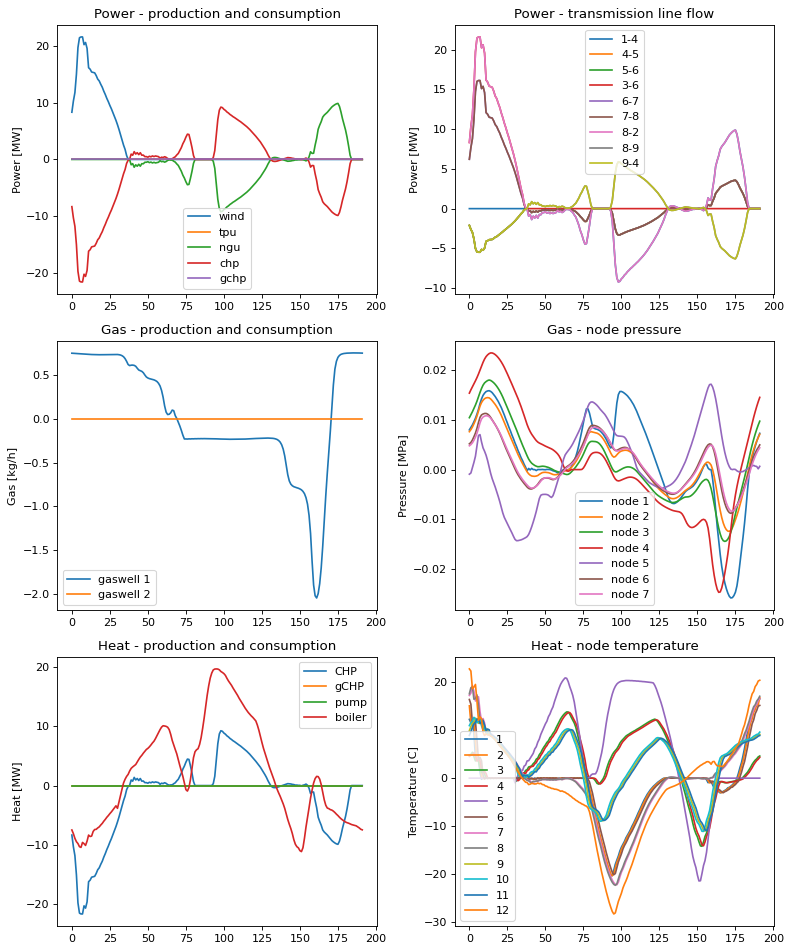

In [19]:
res = Result(path="results/runs/v3/1_20_1e-08_0.001.pkl")
res_og = Result(path="results/runs/v3/None_20_1e-08_0.001.pkl")

comparer = Comparer([res_og, res])
comparer.compare_all()
summary = comparer.summary()
comparer.visualize_comparison()